## Data Description

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

## Objective

## Steps taken for data cleaning or feature engineering

## Insight and key findings

## Next steps

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import math
import pmdarima as pm

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import lag_plot,autocorrelation_plot
#from pylab import rcParams

from datetime import datetime, timedelta

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
import statsmodels.graphics.tsaplots as sgt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AutoReg,ARResults
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("311.csv")

In [3]:
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


## Exploratory Data Analysis

In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              6019843 non-null  int64  
 1   Unique Key              6019843 non-null  int64  
 2   Created Date            6019843 non-null  object 
 3   Closed Date             5893186 non-null  object 
 4   Complaint Type          6019843 non-null  object 
 5   Location Type           5967019 non-null  object 
 6   Incident Zip            5939146 non-null  float64
 7   Incident Address        5967018 non-null  object 
 8   Street Name             5967018 non-null  object 
 9   Address Type            5935078 non-null  object 
 10  City                    5939569 non-null  object 
 11  Status                  6019843 non-null  object 
 12  Resolution Description  6012017 non-null  object 
 13  Borough                 6019843 non-null  object 
 14  La

In [5]:
df.describe()

,Unnamed: 0,Unique Key,Incident Zip,Latitude,Longitude
count,6.019843e+06,6.019843e+06,5.939146e+06,5.939172e+06,5.939172e+06
mean,3.009921e+06,2.956254e+07,1.074698e+04,4.075424e+01,-7.391986e+01
std,1.737779e+06,7.909439e+06,5.130236e+02,9.087877e-02,5.684804e-02
min,0.000000e+00,1.562973e+07,1.000100e+04,4.049934e+01,-7.425312e+01
25%,1.504960e+06,2.291225e+07,1.045200e+04,4.067116e+01,-7.395200e+01
50%,3.009921e+06,2.931010e+07,1.046900e+04,4.075703e+01,-7.392248e+01
75%,4.514882e+06,3.583163e+07,1.122300e+04,4.083958e+01,-7.389023e+01
max,6.019842e+06,4.553204e+07,1.234500e+04,4.091287e+01,-7.370079e+01


In [6]:
df.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date', 'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Address Type', 'City', 'Status', 'Resolution Description', 'Borough', 'Latitude', 'Longitude'], dtype='object')

### Drop unwanted features / Simplifying the Dataset

In [7]:
df.drop(['Unnamed: 0', 'Unique Key','Closed Date','Location Type','City', 'Status', 
         'Resolution Description','Incident Zip', 'Incident Address', 'Street Name',
         'Address Type', 'Latitude', 'Longitude'],axis=1,inplace=True)

In [8]:
df.head()

,Created Date,Complaint Type,Borough
0,02/02/2020 06:09:17 AM,HEAT/HOT WATER,MANHATTAN
1,02/02/2020 02:15:24 PM,UNSANITARY CONDITION,BROOKLYN
2,02/02/2020 02:27:41 AM,HEAT/HOT WATER,QUEENS
3,02/02/2020 12:13:18 PM,HEAT/HOT WATER,BRONX
4,02/02/2020 01:59:44 PM,APPLIANCE,BROOKLYN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Created Date    object
 1   Complaint Type  object
 2   Borough         object
dtypes: object(3)
memory usage: 137.8+ MB


In [ ]:
df["Complaint Type"].value_counts()

In [ ]:
df["Complaint Type"].replace(to_replace="HEATING", value="HEAT/HOT WATER",inplace=True)

In [ ]:
df["Complaint Type"].value_counts()

In [ ]:
df["Borough"].value_counts()

In [ ]:
#Only Heat/Hot Water

heat = df[df["Complaint Type"] == "HEAT/HOT WATER"]

In [ ]:
heat

In [ ]:
heat.reset_index(inplace=True, drop=True)

In [ ]:
heat

In [ ]:
heat["Borough"].value_counts()

In [ ]:
# Focus on Bronx
bronx = heat[heat["Borough"] == "BRONX"]

In [ ]:
bronx

In [ ]:
bronx.reset_index(inplace=True, drop=True)

In [ ]:
bronx

In [ ]:
#bronx.to_csv("timecleaned.csv",index=False)

In [ ]:
df = pd.read_csv("timecleaned.csv")

In [ ]:
df["Created Date"] = pd.to_datetime(df["Created Date"])

In [ ]:
df.info()

In [ ]:
df["date"] = df["Created Date"].dt.date

In [ ]:
df.info()

In [ ]:
df.drop(["Created Date"], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df.info()

In [ ]:
df.groupby("date").count()

In [ ]:
df2 = pd.DataFrame(df.groupby("date").count())

In [ ]:
df2

In [ ]:
df2.drop(["Complaint Type"],axis=1,inplace=True)

In [ ]:
df2

In [ ]:
df2.columns

In [ ]:
df2.rename(columns={"Borough":"count"},inplace=True)

In [ ]:
df2

In [ ]:
df2 = df2.asfreq('D',fill_value=0)

In [ ]:
df2

In [ ]:
#df2.to_csv("heatseries.csv",index=True)

## Time-Series Visualization

In [10]:
df = pd.read_csv("heatseries.csv", parse_dates=["date"], index_col="date")

In [11]:
df.index.freq = "D"

In [12]:
df.head()

,count
date,
2010-01-01,1
2010-01-02,0
2010-01-03,0
2010-01-04,0
2010-01-05,2


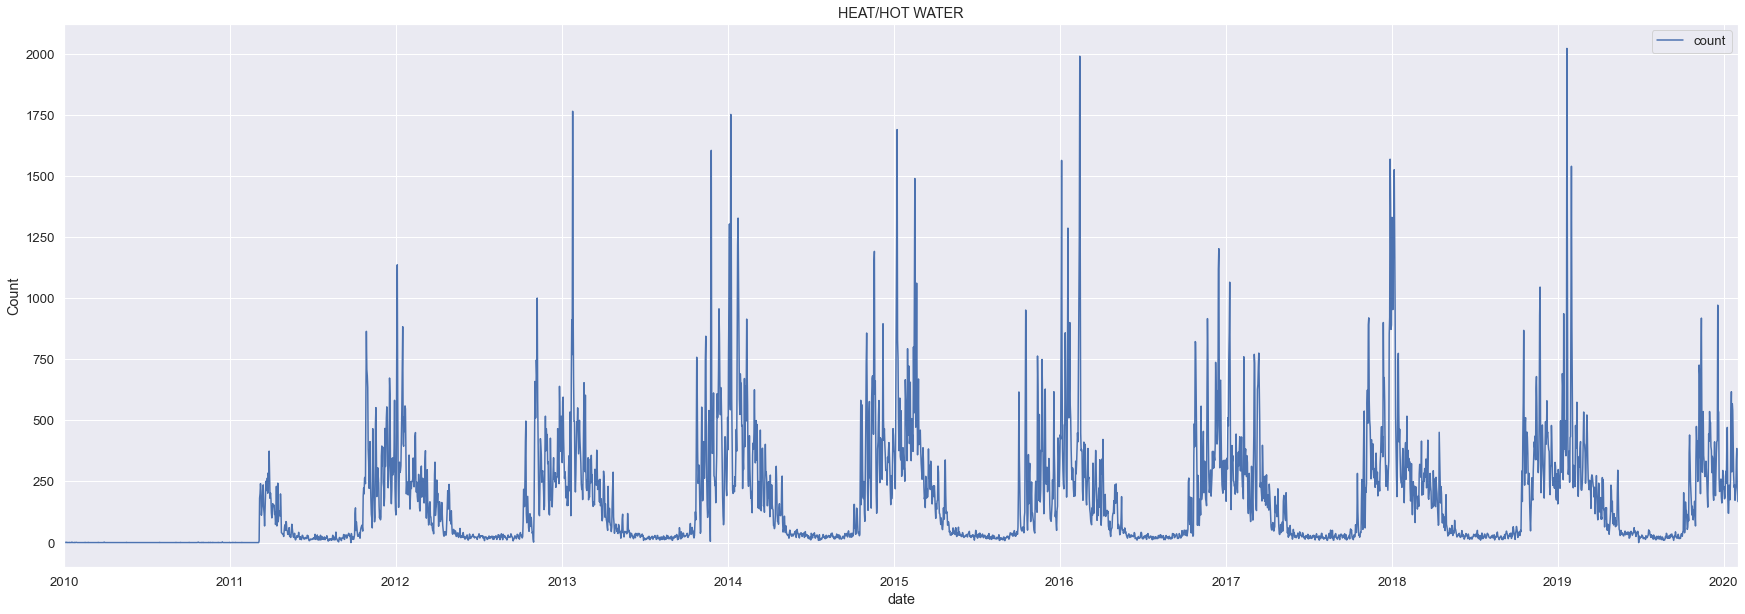

In [13]:
df.plot(figsize=(30,10), title="HEAT/HOT WATER")
plt.ylabel("Count")
plt.show()

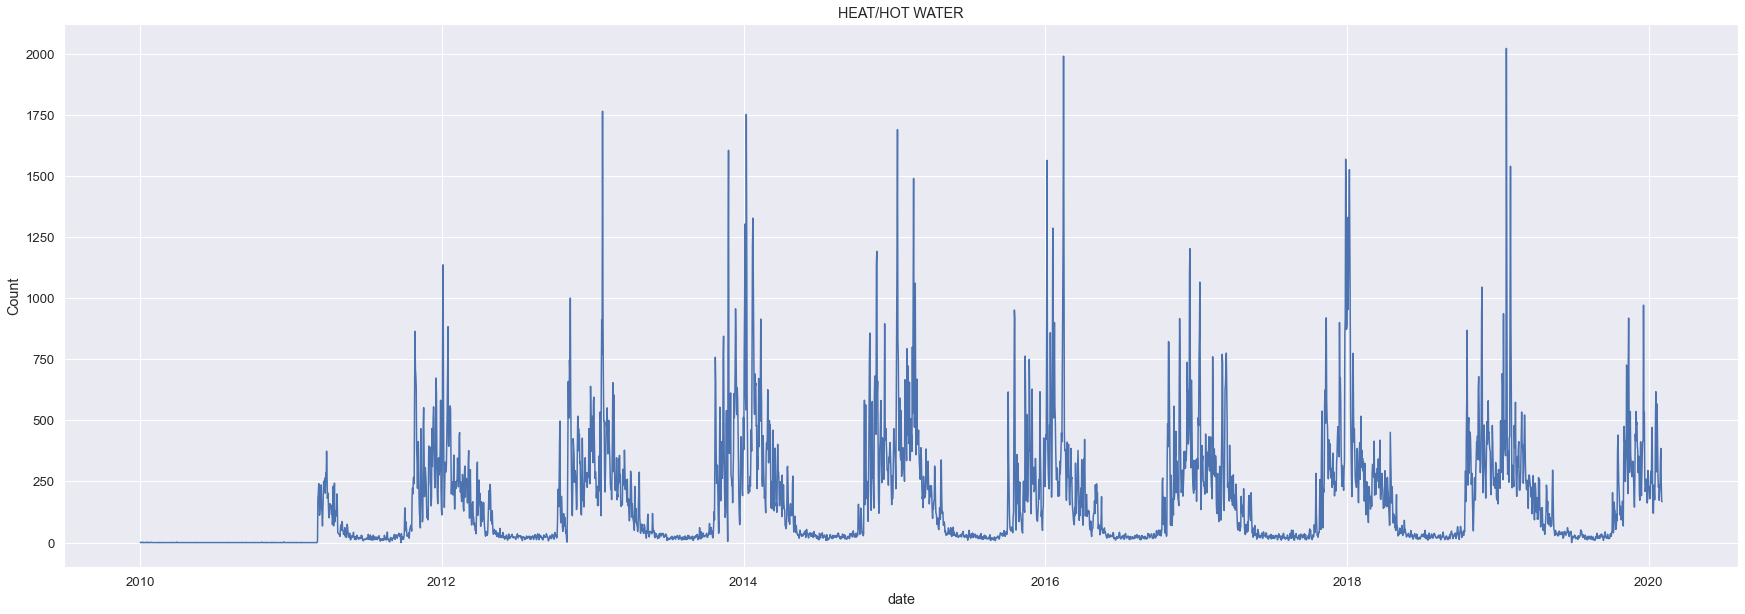

In [14]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df["count"],data=df, estimator=None)
#plt.xticks(rotation=90)
plt.title("HEAT/HOT WATER")
plt.ylabel("Count")
plt.show()

### Zooming in date range

In [15]:
zoom = df[(df.index >= '2011-01-01') & (df.index <= '2011-12-31')]

In [16]:
zoom

,count
date,
2011-01-01,0
2011-01-02,0
2011-01-03,0
2011-01-04,0
2011-01-05,0
...,...
2011-12-27,289
2011-12-28,386
2011-12-29,582


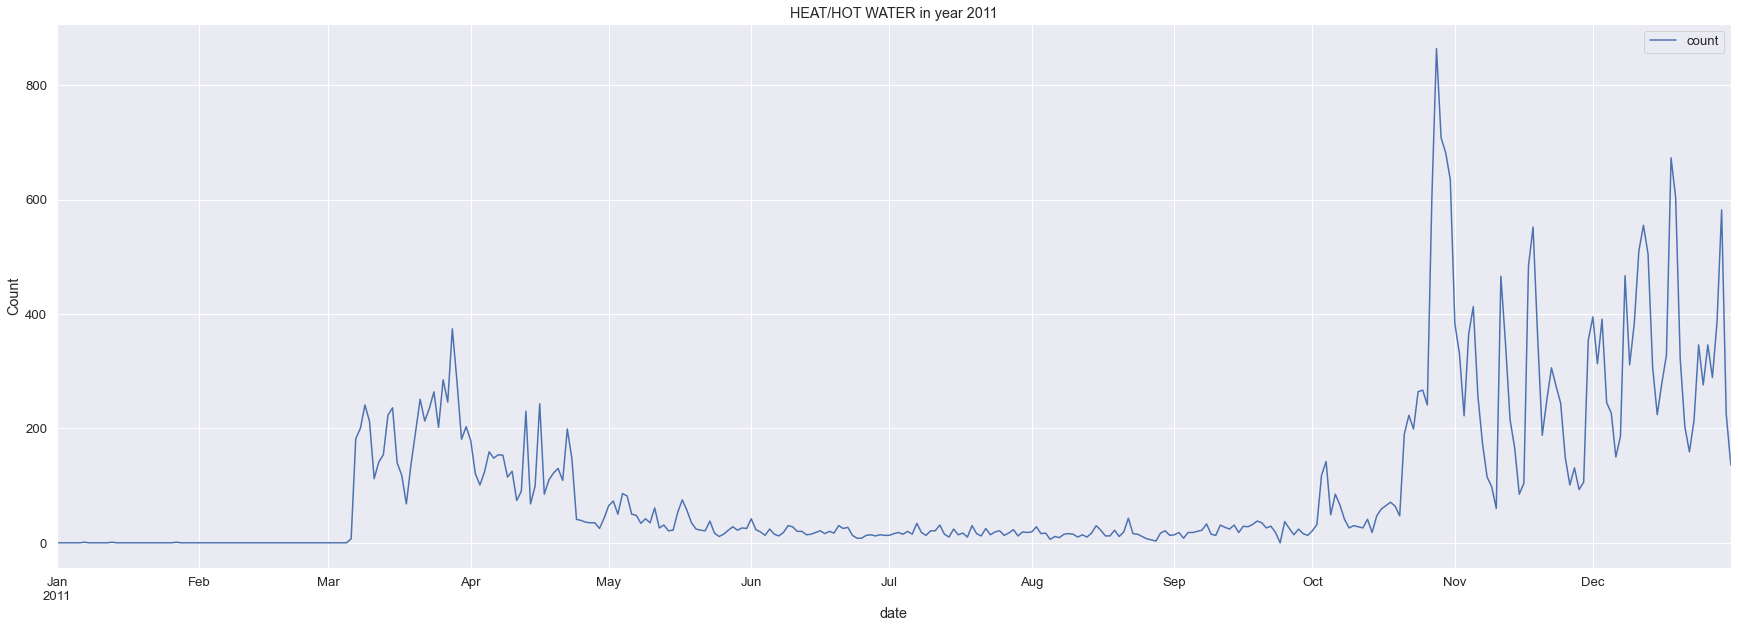

In [17]:
zoom.plot(figsize=(30,10), title="HEAT/HOT WATER in year 2011")
plt.ylabel("Count")
plt.show()

### Trendline

In [18]:
df.reset_index(inplace=True)

In [19]:
df.head()

,date,count
0,2010-01-01,1
1,2010-01-02,0
2,2010-01-03,0
3,2010-01-04,0
4,2010-01-05,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3685 non-null   datetime64[ns]
 1   count   3685 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 57.7 KB


In [21]:
df["count"] = df["count"].astype("float64")

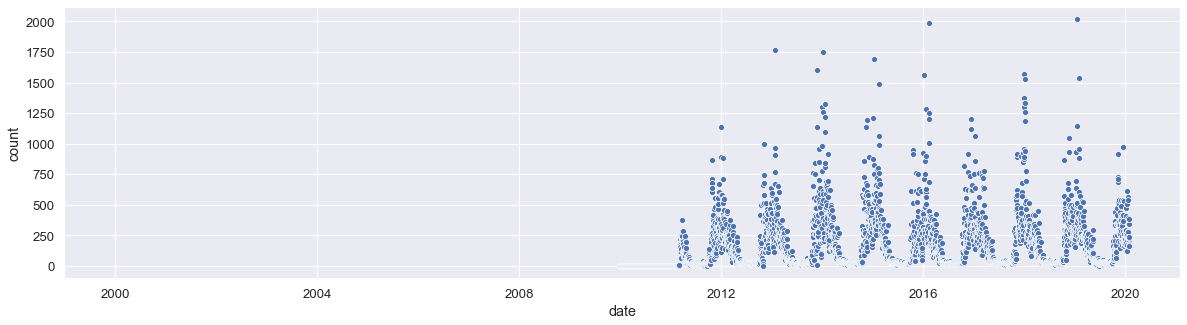

In [22]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df["date"], y=df["count"], data=df, ci=None)
plt.show()

### Autocorrelation Plot

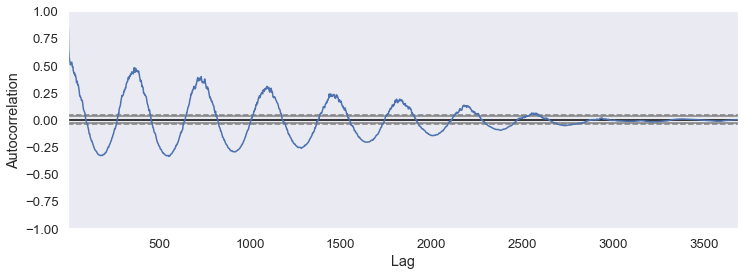

In [23]:
plt.figure(figsize=(12,4))
autocorrelation_plot(df['count'])
plt.show()

### Time series will be modeled from year 2011 onwards

In [24]:
df = pd.read_csv("heatseries.csv", parse_dates=["date"], index_col="date")

In [25]:
df

,count
date,
2010-01-01,1
2010-01-02,0
2010-01-03,0
2010-01-04,0
2010-01-05,2
...,...
2020-01-29,340
2020-01-30,385
2020-01-31,238


In [26]:
#Select 2011 to 2020 years
df = df.loc["2011-01-01":]

In [27]:
#df.to_csv("heatseries2.csv",index=True)

## Decomposing Time Series

### Additive or Multiplication model

In [28]:
df = pd.read_csv("heatseries2.csv", parse_dates=['date'], index_col="date")

In [29]:
df

,count
date,
2011-01-01,0
2011-01-02,0
2011-01-03,0
2011-01-04,0
2011-01-05,0
...,...
2020-01-29,340
2020-01-30,385
2020-01-31,238


In [30]:
df = df.asfreq(freq = "D", fill_value=0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3320 entries, 2011-01-01 to 2020-02-02
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   3320 non-null   int64
dtypes: int64(1)
memory usage: 51.9 KB


In [32]:
df.isnull().sum()

count    0
dtype: int64

In [33]:
#df.to_csv("heatseries2.csv",index=True)

In [34]:
result = seasonal_decompose(x=df['count'], model='additive')

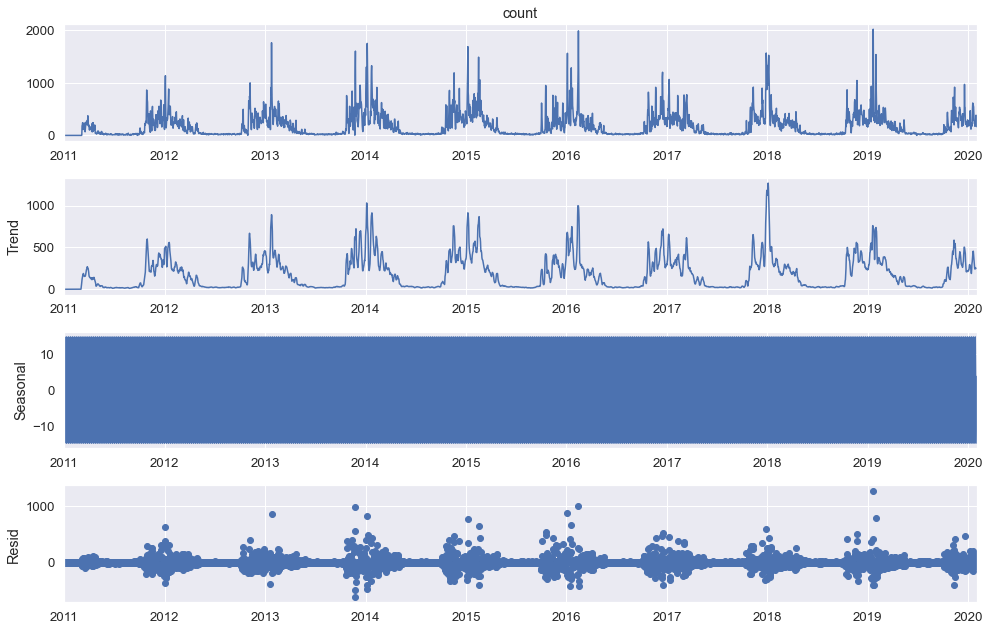

In [35]:
#plt.title("Additive Decomposition")
plt.rcParams['figure.figsize'] = (14,9)
result.plot()
plt.show()

## Stationarity Tests

In [36]:
adfuller(df["count"])

(-4.506042882439898,
 0.00019175470309987352,
 26,
 3293,
 {'1%': -3.432337368601478,
  '5%': -2.8624181018676236,
  '10%': -2.567237431831631},
 40749.736204691915)

In [37]:
dftest = adfuller(df['count'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic','p-value','# Lags Used','# Observations'])

for key,val in dftest[4].items():
    dfout[f'critical value({key})'] = val
dfout

ADF Test Statistic       -4.506043
p-value                   0.000192
# Lags Used              26.000000
# Observations         3293.000000
critical value(1%)       -3.432337
critical value(5%)       -2.862418
critical value(10%)      -2.567237
dtype: float64

Result: Reject null hypothesis and data is stationary. No seasonality is detected.

## Make the time series data stationary

### Differencing Method

In [38]:
df = pd.read_csv("heatseries2.csv", parse_dates=['date'], index_col="date")

In [39]:
df.head()

,count
date,
2011-01-01,0
2011-01-02,0
2011-01-03,0
2011-01-04,0
2011-01-05,0


In [40]:
df.index.freq = "D"

In [41]:
result_a = seasonal_decompose(x=df['count'], model='additive')

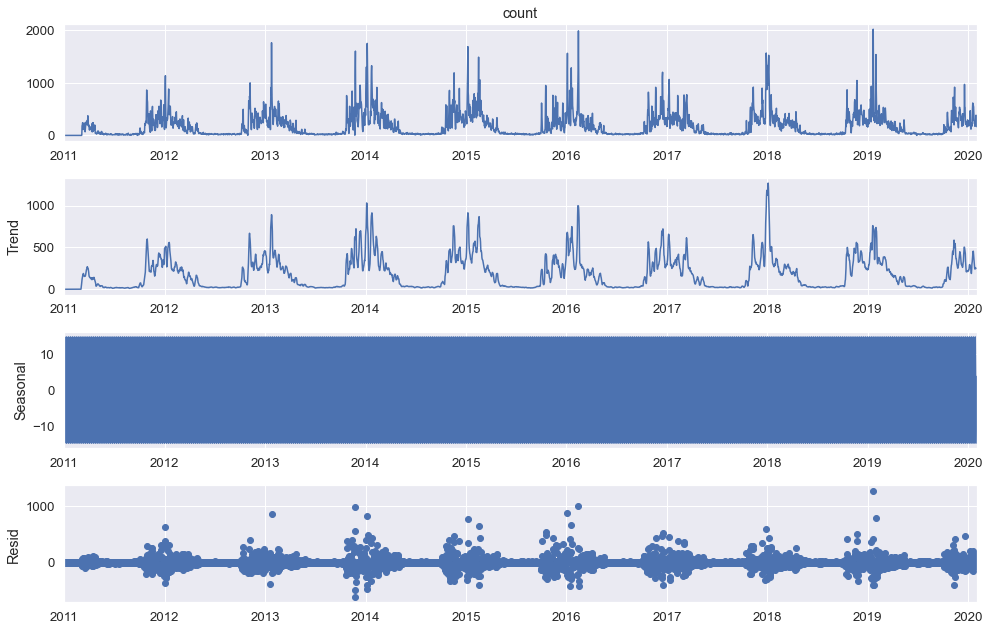

In [42]:
#plt.title("Additive Decomposition")
plt.rcParams['figure.figsize'] = (14,9)
result_a.plot()
plt.show()

In [43]:
df["lag1"] = df['count'].shift(1)

In [44]:
df.head()

,count,lag1
date,,
2011-01-01,0,NaN
2011-01-02,0,0.0
2011-01-03,0,0.0
2011-01-04,0,0.0
2011-01-05,0,0.0


In [45]:
df["diff_1"] = df['count'].diff(periods=1) #Differencing by one period

In [46]:
df.head()

,count,lag1,diff_1
date,,,
2011-01-01,0,NaN,NaN
2011-01-02,0,0.0,0.0
2011-01-03,0,0.0,0.0
2011-01-04,0,0.0,0.0
2011-01-05,0,0.0,0.0


In [47]:
result_b = seasonal_decompose(x=df.iloc[1:,2], model='additive')

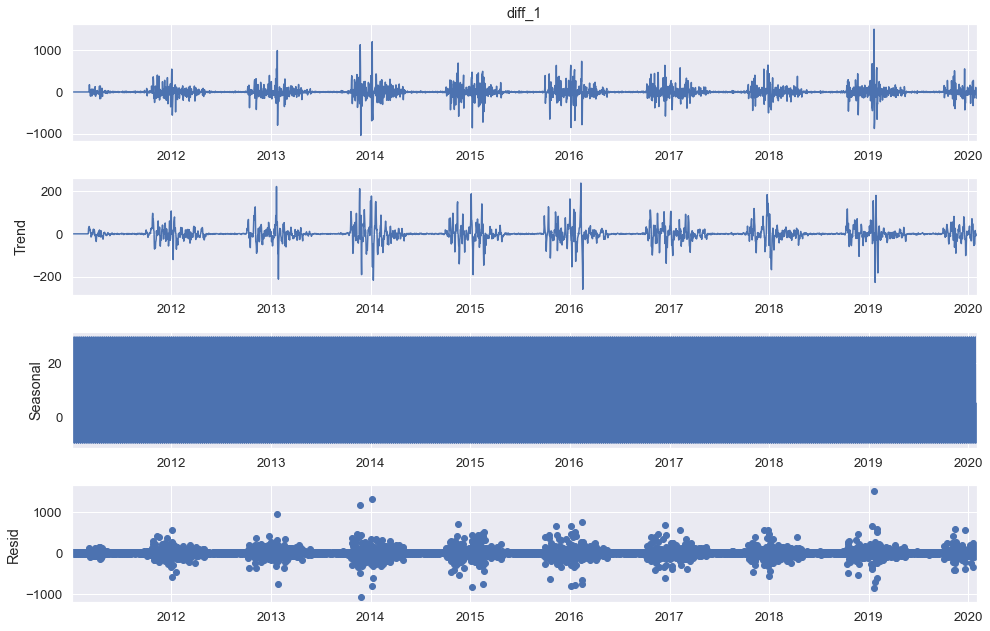

In [48]:
#plt.title("Additive Decomposition")
plt.rcParams['figure.figsize'] = (14,9)
result_b.plot()
plt.show()

**The Trend Graph Line has constant mean and standard deviation.**

#Remove seasonality
df["diff_12"] = df['diff_1'].diff(periods=12)

df.head(20)

result_c = seasonal_decompose(x=df.iloc[13:,3], model='additive')

#plt.title("Additive Decomposition")
plt.rcParams['figure.figsize'] = (14,9)
result_c.plot()
plt.show()

The difference 12 periods removed the seasonality.

#Save as csv
#df.to_csv('cleaned.csv',index=True)

adfuller(df["diff_12"].dropna())

print("ADF Test for Seasonal First Difference")

dftest = adfuller(df["diff_12"].dropna())
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic','p-value','# Lags Used','# Observations'])

for key,val in dftest[4].items():
    dfout[f'critical value({key})'] = val
    
dfout

plt.rcParams['figure.figsize'] = (12,8)
autocorrelation_plot(df["diff_12"].dropna())
plt.title("Autocorrelation Plot for Seasonal First Difference")
plt.show()

In [49]:
df.dropna(inplace=True)

In [50]:
df

,count,lag1,diff_1
date,,,
2011-01-02,0,0.0,0.0
2011-01-03,0,0.0,0.0
2011-01-04,0,0.0,0.0
2011-01-05,0,0.0,0.0
2011-01-06,0,0.0,0.0
...,...,...,...
2020-01-29,340,230.0,110.0
2020-01-30,385,340.0,45.0
2020-01-31,238,385.0,-147.0


## ACF (Autocorrelation Function)

<Figure size 1440x576 with 0 Axes>

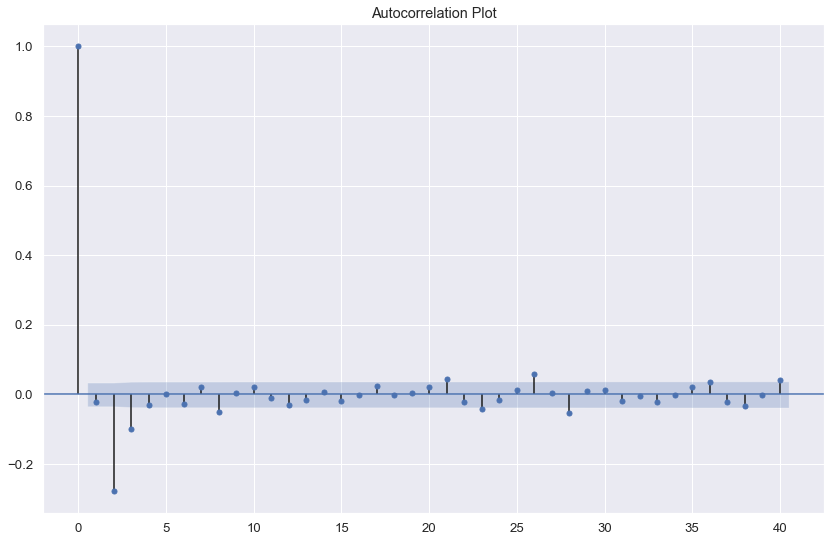

In [51]:
plt.figure(figsize=(20,8))
sgt.plot_acf(df["diff_1"], lags=40)
plt.title("Autocorrelation Plot")
plt.show()

Looking at the ACF plot, we only see a significant peaks at lag 2,3 : MA(2,3) processes.

## PACF (Partial Autocorrelation Function)

<Figure size 1008x576 with 0 Axes>

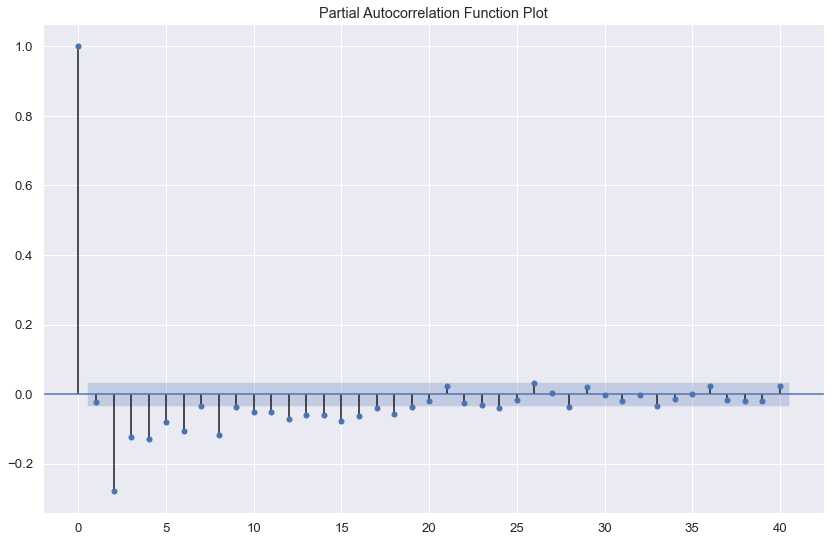

In [52]:
plt.figure(figsize=(14,8))
sgt.plot_pacf(df["diff_1"], lags=40, method='ols')
plt.title("Partial Autocorrelation Function Plot")
plt.show()

We can see from the PACF that we have a significant peak at lag 2 to 5, which suggest an AR(1-9) process. Also, we have another peak at lag 12, suggesting a seasonal autoregressive process of order 1 (P = 1)

## Remove unwanted columns

In [53]:
df.head()

,count,lag1,diff_1
date,,,
2011-01-02,0,0.0,0.0
2011-01-03,0,0.0,0.0
2011-01-04,0,0.0,0.0
2011-01-05,0,0.0,0.0
2011-01-06,0,0.0,0.0


In [54]:
del df["count"]

In [55]:
del df["lag1"]

In [56]:
df.head()

,diff_1
date,
2011-01-02,0.0
2011-01-03,0.0
2011-01-04,0.0
2011-01-05,0.0
2011-01-06,0.0


In [57]:
df.isnull().sum()

diff_1    0
dtype: int64

In [59]:
#df.to_csv("timetrain.csv",index=True)

## Train-Test Split

In [60]:
df = pd.read_csv("timetrain.csv", index_col="date")

In [61]:
df.index = pd.to_datetime(df.index)

In [62]:
df.head()

,diff_1
date,
2011-01-02,0.0
2011-01-03,0.0
2011-01-04,0.0
2011-01-05,0.0
2011-01-06,0.0


In [63]:
df.index.freq = "D"

In [64]:
len(df)

3319

In [65]:
size = int(len(df)*0.8)

In [66]:
size

2655

In [67]:
train = df.iloc[:size]

In [68]:
test = df.iloc[size:]

In [69]:
train

,diff_1
date,
2011-01-02,0.0
2011-01-03,0.0
2011-01-04,0.0
2011-01-05,0.0
2011-01-06,0.0
...,...
2018-04-05,107.0
2018-04-06,-109.0
2018-04-07,-4.0


In [70]:
test

,diff_1
date,
2018-04-10,-23.0
2018-04-11,-47.0
2018-04-12,-40.0
2018-04-13,-44.0
2018-04-14,3.0
...,...
2020-01-29,110.0
2020-01-30,45.0
2020-01-31,-147.0


In [71]:
train.shape, test.shape

((2655, 1), (664, 1))

## Time-series modeling

### Holt Winters Method

In [ ]:
# fitted_model = ExponentialSmoothing(endog=train["diff_12"], trend="additive",seasonal="additive", 
#                                     seasonal_periods=12).fit()

In [ ]:
# hwpred = fitted_model.forecast(15)

In [ ]:
# hwpred

In [ ]:
# test_data = test[:15]

In [ ]:
# test_data

In [ ]:
# train['diff_12'].plot(legend=True,label="Train",figsize=(16,5))
# test['diff_12'].plot(legend=True,label="Test")
# hwpred.plot(legend=True,label="Prediction")
# plt.show()

In [ ]:
#Zoom into selected time frame
# train['diff_12'].plot(legend=True,label="Train",figsize=(16,5))
# test['diff_12'].plot(legend=True,label="Test")
# hwpred.plot(legend=True,label="Prediction",xlim=['2012-08-10','2012-08-24'])
# plt.show()

### HW Model Evaluation

In [ ]:
# test_data.describe()

In [ ]:
# mse = mean_squared_error(test_data,hwpred)
# mse

In [ ]:
# rmse = np.sqrt(mse)
# rmse

### Naive(Persistence Model)

In [ ]:
# df = pd.read_csv("cleaned.csv",parse_dates=['dteday'],index_col='dteday')

In [ ]:
# df.head()

In [ ]:
# size = int(len(df)*0.8)

In [ ]:
# size

In [ ]:
# train = df.iloc[:size]

In [ ]:
# test = df.iloc[size:]

In [ ]:
# train

In [ ]:
# train = train[1:]

In [ ]:
# train

In [ ]:
# test

In [ ]:
# train.shape, test.shape

In [ ]:
# train_X, train_y = train['lag1'], train["cnt"]
# test_X, test_y = test['lag1'], test["cnt"]

In [ ]:
# predictions = test_X.copy()

In [ ]:
# print(predictions)
# print(test_y)

### Naive Model Evaluation

In [ ]:
# mse = mean_squared_error(test_y,predictions)
# mse

In [ ]:
# rmse = np.sqrt(mse)
# rmse

In [ ]:
# plt.figure(figsize=(20,5))
# plt.plot(test_y)
# plt.plot(predictions)
# plt.legend(["Test","Predictions"])
# plt.title("Comparison of Test versus Predictions")
# plt.show()

A good model is the one that has minimum AIC among all the other models. The AIC can be used to select between the additive and multiplicative Holt-Winters models.

### Autoregression Model

In [72]:
armodel = ARMA(train["diff_1"],order=(4,0))

In [73]:
armodel_fit = armodel.fit()

In [74]:
armodel_fit.params

const           0.078845
ar.L1.diff_1   -0.052848
ar.L2.diff_1   -0.317841
ar.L3.diff_1   -0.108955
ar.L4.diff_1   -0.142307
dtype: float64

In [75]:
armodel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 diff_1   No. Observations:                 2655
Model:                     ARMA(4, 0)   Log Likelihood              -16513.094
Method:                       css-mle   S.D. of innovations            121.587
Date:                Sat, 10 Oct 2020   AIC                          33038.188
Time:                        17:55:16   BIC                          33073.493
Sample:                    01-02-2011   HQIC                         33050.966
                         - 04-09-2018                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0788      1.455      0.054      0.957      -2.774       2.931
ar.L1.diff_1    -0.0528      0.019     -2.751      0.006      -0.090      -0.015
ar.L2.diff_1    -0.3178      0.019    -16.627      0.000      -0.355      -0.280
ar.L3.diff_1    -0.1090      0.019     -5.701      0.000      -0.146      -0.071
ar.L4.diff_1    -0.1423      0.019     -7.412      0.000      -0.180      -0.105
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7163           -1.3088j            1.4920           -0.1703
AR.2            0.7163           +1.3088j            1.4920            0.1703
AR.3           -1.0991           -1.3959j            1.7767           -0.3562
AR.4           -1.0991           +1.3959j            1.7767            0.3562
-----------------------------------------------------------------------------
"""

In [76]:
arpredictions = armodel_fit.predict(start=len(train),end=len(train)+len(test)-1).rename("ARPredictions")

In [77]:
arpredictions

2018-04-10   -19.846164
2018-04-11     2.020617
2018-04-12    -6.171664
2018-04-13     7.951034
2018-04-14     4.273381
                ...    
2020-01-29     0.078845
2020-01-30     0.078845
2020-01-31     0.078845
2020-02-01     0.078845
2020-02-02     0.078845
Freq: D, Name: ARPredictions, Length: 664, dtype: float64

In [78]:
print(test)

            diff_1
date              
2018-04-10   -23.0
2018-04-11   -47.0
2018-04-12   -40.0
2018-04-13   -44.0
2018-04-14     3.0
...            ...
2020-01-29   110.0
2020-01-30    45.0
2020-01-31  -147.0
2020-02-01   -69.0
2020-02-02    -2.0

[664 rows x 1 columns]


In [79]:
mse = mean_squared_error(test, arpredictions)
mse

16663.376713327296

In [80]:
rmse = np.sqrt(mse)
rmse

129.08670231021975

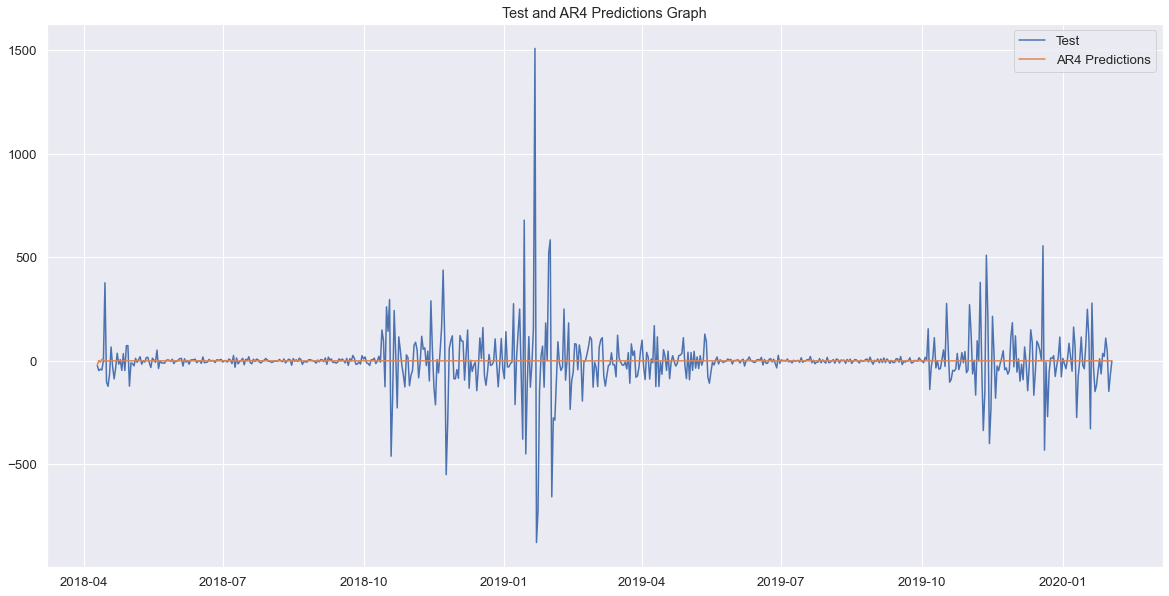

In [81]:
plt.figure(figsize=(20,10))
plt.plot(test.diff_1)
plt.plot(arpredictions)
plt.legend(["Test","AR4 Predictions"])
plt.title("Test and AR4 Predictions Graph")
plt.show()

### Moving Average Model

In [82]:
mavgmodel = ARMA(endog=train,order=(0,4))

In [83]:
mavgmodel_fit = mavgmodel.fit()

In [84]:
mavgmodel_fit.params

const           0.080422
ma.L1.diff_1   -0.115958
ma.L2.diff_1   -0.388247
ma.L3.diff_1   -0.162125
ma.L4.diff_1   -0.115194
dtype: float64

In [85]:
mavgmodel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 diff_1   No. Observations:                 2655
Model:                     ARMA(0, 4)   Log Likelihood              -16448.965
Method:                       css-mle   S.D. of innovations            118.672
Date:                Sat, 10 Oct 2020   AIC                          32909.931
Time:                        17:55:33   BIC                          32945.236
Sample:                    01-02-2011   HQIC                         32922.709
                         - 04-09-2018                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0804      0.505      0.159      0.873      -0.909       1.070
ma.L1.diff_1    -0.1160      0.019     -6.015      0.000      -0.154      -0.078
ma.L2.diff_1    -0.3882      0.019    -20.620      0.000      -0.425      -0.351
ma.L3.diff_1    -0.1621      0.020     -8.199      0.000      -0.201      -0.123
ma.L4.diff_1    -0.1152      0.019     -6.002      0.000      -0.153      -0.078
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.1083           -0.0000j            1.1083           -0.0000
MA.2           -1.6546           -0.0000j            1.6546           -0.5000
MA.3           -0.4306           -2.1327j            2.1757           -0.2817
MA.4           -0.4306           +2.1327j            2.1757            0.2817
-----------------------------------------------------------------------------
"""

In [86]:
mavg_predictions = mavgmodel_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [87]:
mavg_predictions

2018-04-10   -15.245457
2018-04-11     2.139101
2018-04-12    -3.126390
2018-04-13     4.793165
2018-04-14     0.080422
                ...    
2020-01-29     0.080422
2020-01-30     0.080422
2020-01-31     0.080422
2020-02-01     0.080422
2020-02-02     0.080422
Freq: D, Length: 664, dtype: float64

In [88]:
print(test)

            diff_1
date              
2018-04-10   -23.0
2018-04-11   -47.0
2018-04-12   -40.0
2018-04-13   -44.0
2018-04-14     3.0
...            ...
2020-01-29   110.0
2020-01-30    45.0
2020-01-31  -147.0
2020-02-01   -69.0
2020-02-02    -2.0

[664 rows x 1 columns]


In [89]:
mse = mean_squared_error(test, mavg_predictions)
mse

16661.475975640882

In [90]:
rmse = np.sqrt(mse)
rmse

129.07933984817586

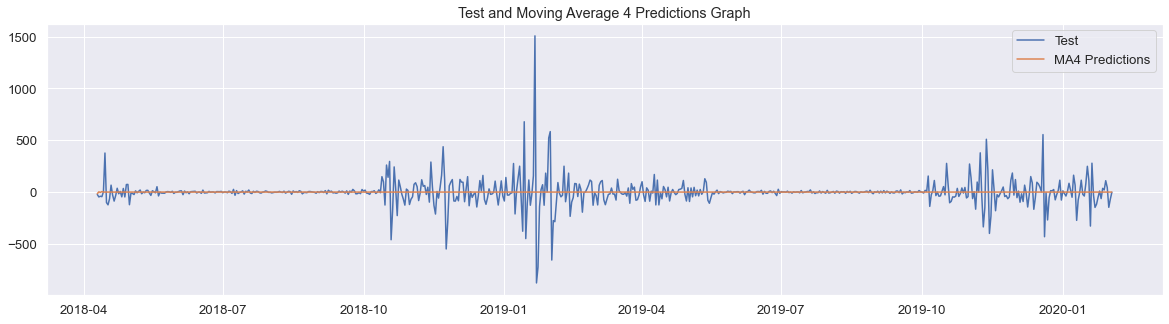

In [91]:
plt.figure(figsize=(20,5))
plt.plot(test)
plt.plot(mavg_predictions)
plt.legend(["Test","MA4 Predictions"])
plt.title("Test and Moving Average 4 Predictions Graph")
plt.show()

### ARMA Model

In [92]:
armamodel = ARMA(train,order=(2,2))

In [93]:
armamodel_fit = armamodel.fit()

In [94]:
armamodel_fit.params

const           0.082440
ar.L1.diff_1    0.297343
ar.L2.diff_1    0.138904
ma.L1.diff_1   -0.411384
ma.L2.diff_1   -0.478720
dtype: float64

In [95]:
armamodel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 diff_1   No. Observations:                 2655
Model:                     ARMA(2, 2)   Log Likelihood              -16441.622
Method:                       css-mle   S.D. of innovations            118.344
Date:                Sat, 10 Oct 2020   AIC                          32895.244
Time:                        17:55:48   BIC                          32930.549
Sample:                    01-02-2011   HQIC                         32908.022
                         - 04-09-2018                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0824      0.450      0.183      0.855      -0.799       0.964
ar.L1.diff_1     0.2973      0.073      4.051      0.000       0.153       0.441
ar.L2.diff_1     0.1389      0.058      2.379      0.017       0.024       0.253
ma.L1.diff_1    -0.4114      0.068     -6.007      0.000      -0.546      -0.277
ma.L2.diff_1    -0.4787      0.066     -7.276      0.000      -0.608      -0.350
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8184           +0.0000j            1.8184            0.0000
AR.2           -3.9591           +0.0000j            3.9591            0.5000
MA.1            1.0781           +0.0000j            1.0781            0.0000
MA.2           -1.9375           +0.0000j            1.9375            0.5000
-----------------------------------------------------------------------------
"""

In [96]:
armapredictions = armamodel_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [97]:
armapredictions

2018-04-10   -17.515157
2018-04-11     9.124188
2018-04-12     0.326564
2018-04-13     1.410964
2018-04-14     0.511377
                ...    
2020-01-29     0.082440
2020-01-30     0.082440
2020-01-31     0.082440
2020-02-01     0.082440
2020-02-02     0.082440
Freq: D, Length: 664, dtype: float64

In [98]:
print(test)

            diff_1
date              
2018-04-10   -23.0
2018-04-11   -47.0
2018-04-12   -40.0
2018-04-13   -44.0
2018-04-14     3.0
...            ...
2020-01-29   110.0
2020-01-30    45.0
2020-01-31  -147.0
2020-02-01   -69.0
2020-02-02    -2.0

[664 rows x 1 columns]


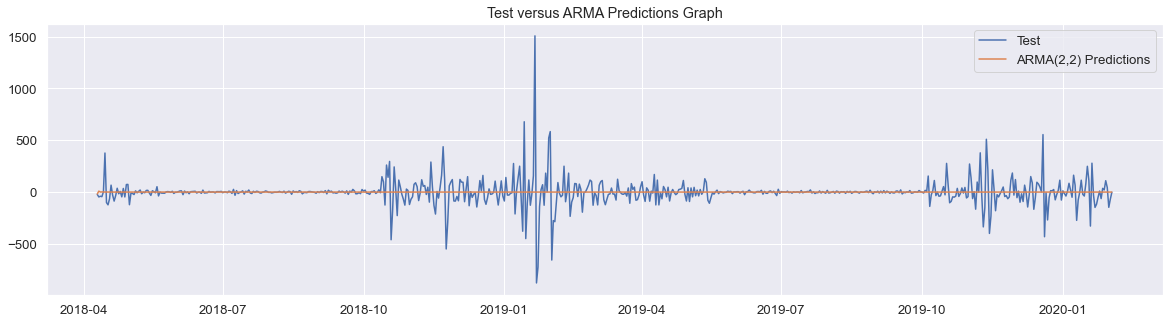

In [99]:
plt.figure(figsize=(20,5))
plt.plot(test)
plt.plot(armapredictions)
plt.legend(["Test","ARMA(2,2) Predictions"])
plt.title("Test versus ARMA Predictions Graph")
plt.show()

In [100]:
mse = mean_squared_error(test, armapredictions)
mse

16662.188651619785

In [101]:
rmse = np.sqrt(mse)
rmse

129.08210043077153

### ARIMA Model

In [ ]:
arimamodel = ARIMA(endog=train,order=(7,1,3))

In [ ]:
arimamodel_fit = arimamodel.fit(trend='c')

In [ ]:
arimamodel_fit.summary()

In [ ]:
arimapredictions = arimamodel_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels').rename("ARIMA Predictions")

In [ ]:
arimapredictions

In [ ]:
print(test)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test)
plt.plot(arimapredictions)
plt.legend(["Test","ARIMA (7,1,3) Predictions"])
plt.title("Test versus ARIMA Predictions Graph")
plt.show()

In [ ]:
mse = mean_squared_error(test,arimapredictions)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

### SARIMA Model

In [ ]:
sarimamodel = SARIMAX(endog=train, order=(7,1,3), seasonal_order=(3,1,1,12))

In [ ]:
sarimamodel_fit = sarimamodel.fit()

In [ ]:
sarimamodel_fit.summary()

In [ ]:
sarimapredictions = sarimamodel_fit.predict(start=len(train), end=len(train) + len(test) - 1).rename("SARIMA Predictions")

In [ ]:
sarimapredictions

In [ ]:
print(test)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test)
plt.plot(sarimapredictions)
plt.legend(["Test","SARIMA Predictions"])
plt.title("Test versus SARIMA Predictions Graph")
plt.show()

In [ ]:
mse = mean_squared_error(test,sarimapredictions)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

### Examine residuals

In [ ]:
predictions = pd.DataFrame(sarimapredictions, index=test.index)

In [ ]:
predictions

In [ ]:
tests = pd.DataFrame(test, index=test.index)

In [ ]:
tests

In [ ]:
finaldf = pd.concat([tests,predictions],axis=1)

In [ ]:
finaldf

In [ ]:
finaldf.info()

In [ ]:
finaldf["residuals"] = finaldf["diff_12"] - finaldf["SARIMA Predictions"]

In [ ]:
finaldf

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(finaldf.residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

### Auto-ARIMA

In [102]:
train.shape, test.shape

((2655, 1), (664, 1))

In [103]:
stepwise_model = auto_arima(y=train,exogenous=None,m=1,max_order=None,d=None,stationary=True,
                           max_p=7,max_q=7, max_d=2, max_P=4, max_Q=4, max_D=2,
                           maxiter=50, alpha=0.05, n_jobs=-1,trend=None, information_criterion='aic',
                           out_of_sample_size=int(len(df)*0.2),seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=32895.244, Time=3.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=33325.832, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=33327.690, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=33327.510, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33323.834, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=32898.809, Time=2.86 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=32926.982, Time=2.60 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=32896.993, Time=5.47 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=32896.523, Time=6.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=33015.999, Time=1.47 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=32894.633, Time=3.73 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=32943.302, Time=2.83 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=32896.552, Time=6.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=33015.199, Time=1.93 sec
 ARIMA(0,0,4)(0,0,0

In [104]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2655
Model:               SARIMAX(2, 0, 4)   Log Likelihood              -16439.026
Date:                Sat, 10 Oct 2020   AIC                          32892.051
Time:                        17:58:52   BIC                          32933.241
Sample:                             0   HQIC                         32906.959
                               - 2655                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3653      0.040     -9.049      0.000      -0.444      -0.286
ar.L2          0.5632      0.046     12.204      0.000       0.473       0.654
ma.L1          0.2514      0.043      5.913      0.000       0.168       0.335
ma.L2         -0.9813      0.044    -22.195      0.000      -1.068      -0.895
ma.L3         -0.1947      0.030     -6.556      0.000      -0.253      -0.137
ma.L4          0.0799      0.026      3.092      0.002       0.029       0.131
sigma2      1.398e+04    135.144    103.429      0.000    1.37e+04    1.42e+04
===================================================================================
Ljung-Box (Q):                       61.07   Jarque-Bera (JB):             35690.07
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                             2.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
print(stepwise_model.aic())

32892.0514308404


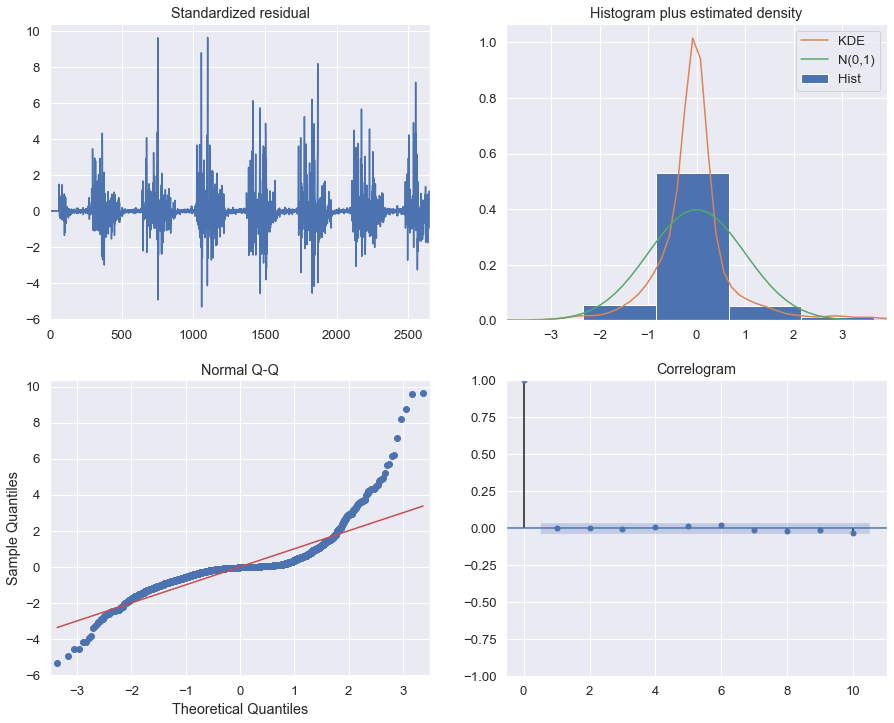

In [106]:
stepwise_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [107]:
stepwise_model.fit(train)

ARIMA(order=(2, 0, 4), out_of_sample_size=663, scoring_args={},
      with_intercept=False)

In [108]:
autopredict = stepwise_model.predict(n_periods=664)

In [109]:
autopredict

array([-24.20506924,  15.00223508,  -2.68612494,   5.58588131,
        -3.55340042,   4.44399435,  -3.62468438,   3.82694388,
        -3.43941105,   3.41174776,  -3.18338984,   3.08438721,
        -2.91961245,   2.80366074,  -2.66850315,   2.55382566,
        -2.43581348,   2.32811713,  -2.22231128,   2.12300577,
        -2.02713964,   1.93619087,  -1.8489755 ,   1.76589337,
        -1.68642378,   1.61060169,  -1.53814661,   1.46897576,
        -1.40290096,   1.33980681,  -1.27954519,   1.221997  ,
        -1.16703531,   1.11454666,  -1.06441814,   1.01654458,
        -0.97082399,   0.92715987,  -0.88545954,   0.84563477,
        -0.80760116,   0.77127818,  -0.73658886,   0.70345975,
        -0.67182066,   0.64160459,  -0.61274753,   0.58518836,
        -0.55886869,   0.53373279,  -0.50972742,   0.48680171,
        -0.46490713,   0.44399728,  -0.42402788,   0.40495664,
        -0.38674315,   0.36934883,  -0.35273685,   0.33687202,
        -0.32172073,   0.30725089,  -0.29343186,   0.28

In [110]:
autopredictdf = pd.DataFrame(autopredict,index=test.index, columns=["prediction"])

In [111]:
autopredictdf

,prediction
date,
2018-04-10,-2.420507e+01
2018-04-11,1.500224e+01
2018-04-12,-2.686125e+00
2018-04-13,5.585881e+00
2018-04-14,-3.553400e+00
...,...
2020-01-29,3.435012e-13
2020-01-30,-3.280518e-13
2020-01-31,3.132972e-13


In [112]:
train

,diff_1
date,
2011-01-02,0.0
2011-01-03,0.0
2011-01-04,0.0
2011-01-05,0.0
2011-01-06,0.0
...,...
2018-04-05,107.0
2018-04-06,-109.0
2018-04-07,-4.0


In [113]:
test

,diff_1
date,
2018-04-10,-23.0
2018-04-11,-47.0
2018-04-12,-40.0
2018-04-13,-44.0
2018-04-14,3.0
...,...
2020-01-29,110.0
2020-01-30,45.0
2020-01-31,-147.0


In [114]:
testdf = pd.DataFrame(test.values, index=test.index, columns=["test"])

In [115]:
testdf

,test
date,
2018-04-10,-23.0
2018-04-11,-47.0
2018-04-12,-40.0
2018-04-13,-44.0
2018-04-14,3.0
...,...
2020-01-29,110.0
2020-01-30,45.0
2020-01-31,-147.0


In [116]:
finalresult = pd.concat([testdf,autopredictdf],axis=1)

In [117]:
finalresult

,test,prediction
date,,
2018-04-10,-23.0,-2.420507e+01
2018-04-11,-47.0,1.500224e+01
2018-04-12,-40.0,-2.686125e+00
2018-04-13,-44.0,5.585881e+00
2018-04-14,3.0,-3.553400e+00
...,...,...
2020-01-29,110.0,3.435012e-13
2020-01-30,45.0,-3.280518e-13
2020-01-31,-147.0,3.132972e-13


In [119]:
#finalresult.to_csv("timeresult.csv",index=True)

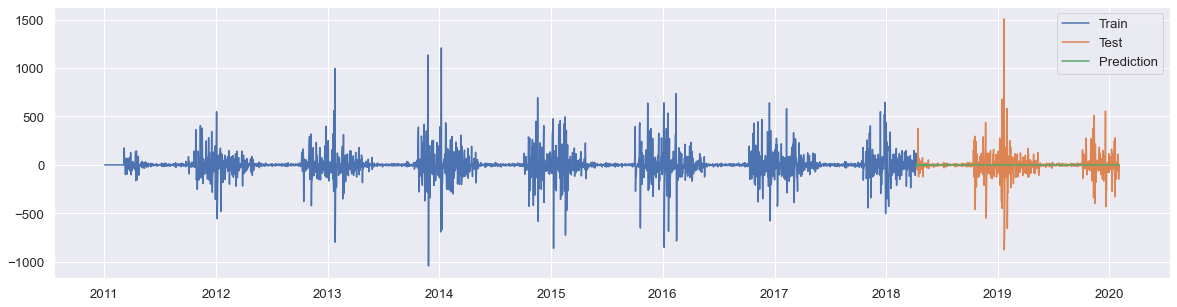

In [120]:
#plot the predictions for validation set
plt.figure(figsize=(20,5))
plt.plot(train, label='Train')
plt.plot(testdf, label='Test')
plt.plot(autopredictdf, label='Prediction')
plt.legend()
plt.show()

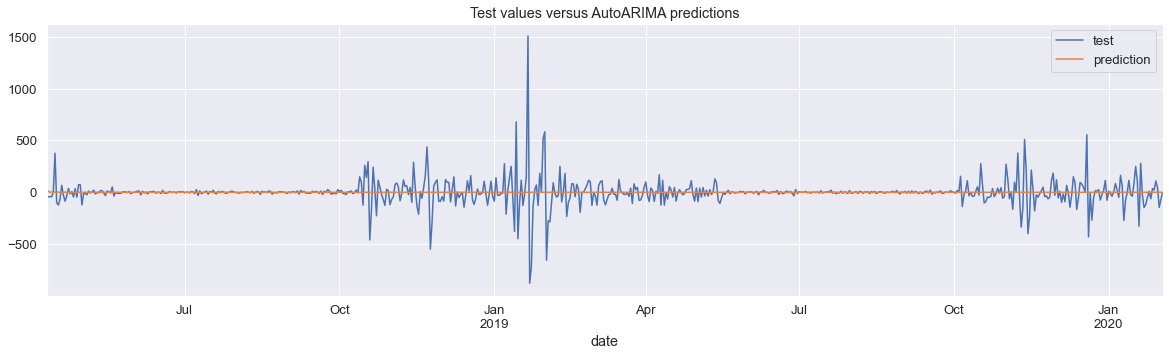

In [121]:
finalresult.test.plot(figsize=(20,5),legend=True)
finalresult.prediction.plot(legend=True)
plt.title("Test values versus AutoARIMA predictions")
plt.show()

### Zooming in date range

In [125]:
zoom = finalresult[(finalresult.index >= '2018-04-10') & (finalresult.index <= '2018-05-10')]

In [126]:
zoom

,test,prediction
date,,
2018-04-10,-23.0,-24.205069
2018-04-11,-47.0,15.002235
2018-04-12,-40.0,-2.686125
2018-04-13,-44.0,5.585881
2018-04-14,3.0,-3.553400
2018-04-15,377.0,4.443994
2018-04-16,-101.0,-3.624684
2018-04-17,-123.0,3.826944
2018-04-18,-65.0,-3.439411


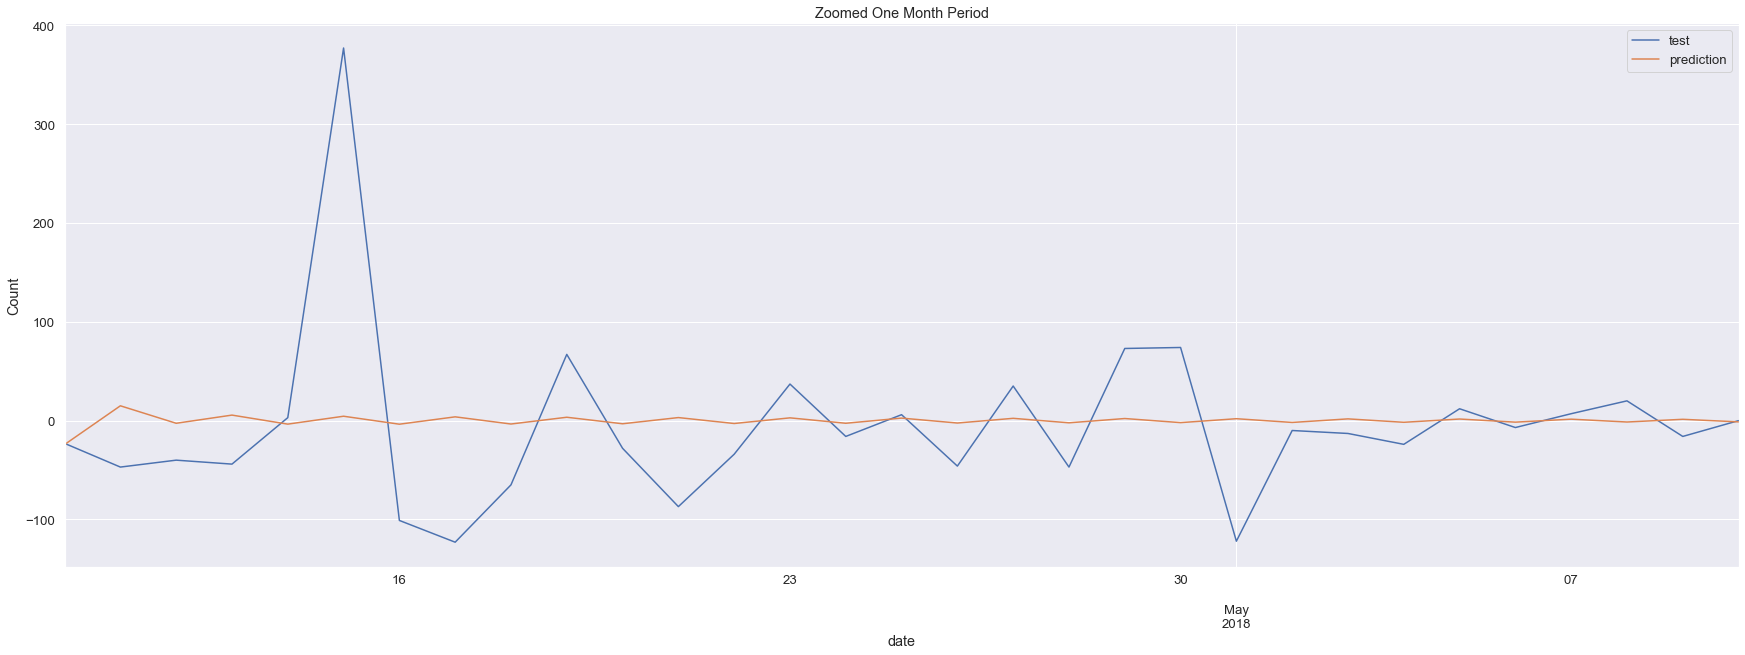

In [127]:
zoom.plot(figsize=(30,10), title="Zoomed One Month Period")
plt.ylabel("Count")
plt.show()

### Model Evaluation

In [128]:
test = finalresult.test
prediction = finalresult.prediction

In [129]:
mse = mean_squared_error(test,prediction)
mse

16657.1334559219

In [130]:
rmse = np.sqrt(mse)
rmse

129.06251762584634